![QMUL](Images/QMUL-logo.jpg)

# Introduction to Approximate Bayesian Computation in population genetics

## Bayesian thinking

### Intended Learning Outcomes

At the end of this part you will be able to:
* appreciate the applicability of ABC,
* describe the rejection algorithm,
* critically discuss the choice of summary statistics,
* implement ABC methods.

### the eyes and the brain

"You know, guys? I have just seen the Loch Ness monster outside my window! Can you believe that?"
<img src="Images/LochNessMonster.jpg" width="300" height="300" />

What does this information tell you about the existence of Nessie?

In the classic frequentist, or likelihoodist, approach you make some inferences based on all the data that you have observed.
The only data that you observe here is me telling you whether or not I saw Nessie.
In other words, your inference on whether Nessie exists or not will be solely based on such observations.

Let's assume that 3 people out of 4 tell us that they have seen the Monster (M) outside their windows, while 1 participant claimed that it was just a big fish (F). Let's denote $\theta$ a random variable that expresses the probability that if now look outside your window you will see Nessie, the Monster.




_What is the log-likelihood distribution of $\theta$? What is the Maximum Likelihood Estimate (MLE) of $\theta$? What is the likelihood ratio in favour of the hypothesis of Nessie existing?_

In [15]:
# observations: this is our data D={MMFM} (3 monsters, 1 fish)

# parameter space: probability to see M goes from 0 to 1, and it is continuous
thetas <- seq(0,1,0.001) # approximate the continuous space

In [2]:
# likelihood
like <- c()
for (theta in thetas) like <- c(like, (theta^3)*(1-theta)^1)


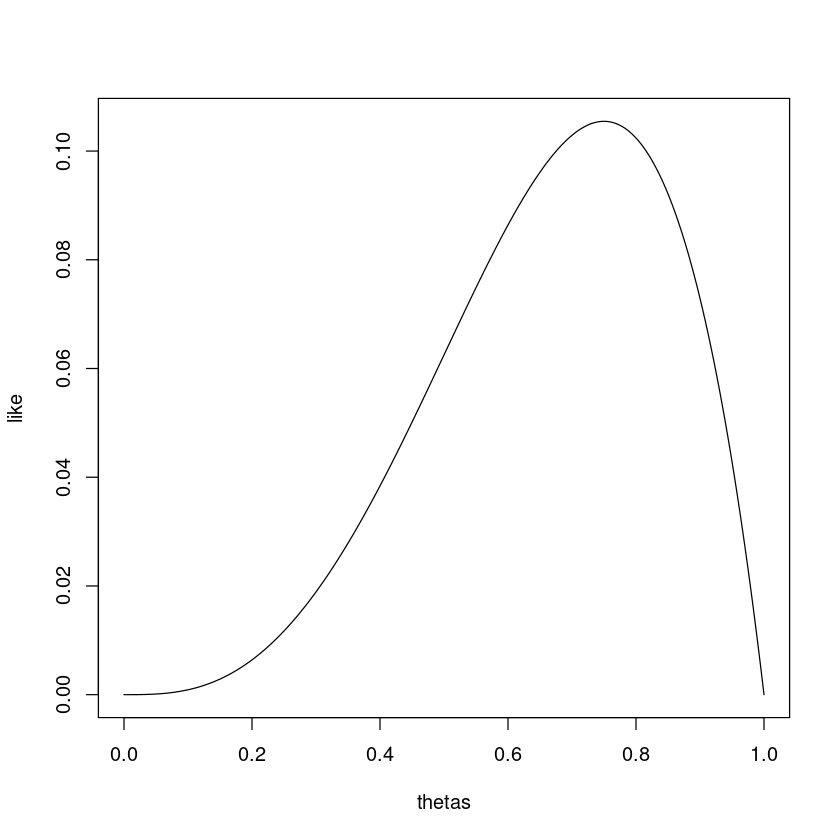

In [3]:
plot(thetas,like, type="l")

[1] 0.75

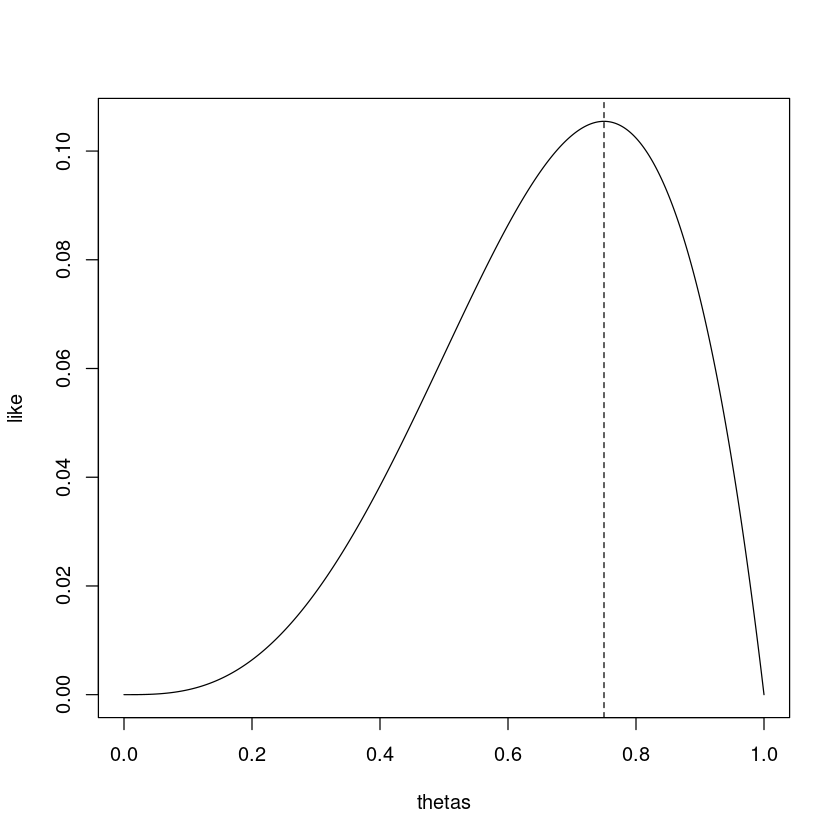

In [5]:
# MLE
thetas[which.max(like)]
plot(thetas,like, type="l")
abline(v=thetas[which.max(like)], lty=2)

In [14]:
# LRT: 
# H0: theta<=0.05
# HA: theta>0.05
tD <- 2*log(max(like)/like[which(thetas==0.05)])
# p-value
1-pchisq(tD,1)

[1] 0.0002288155

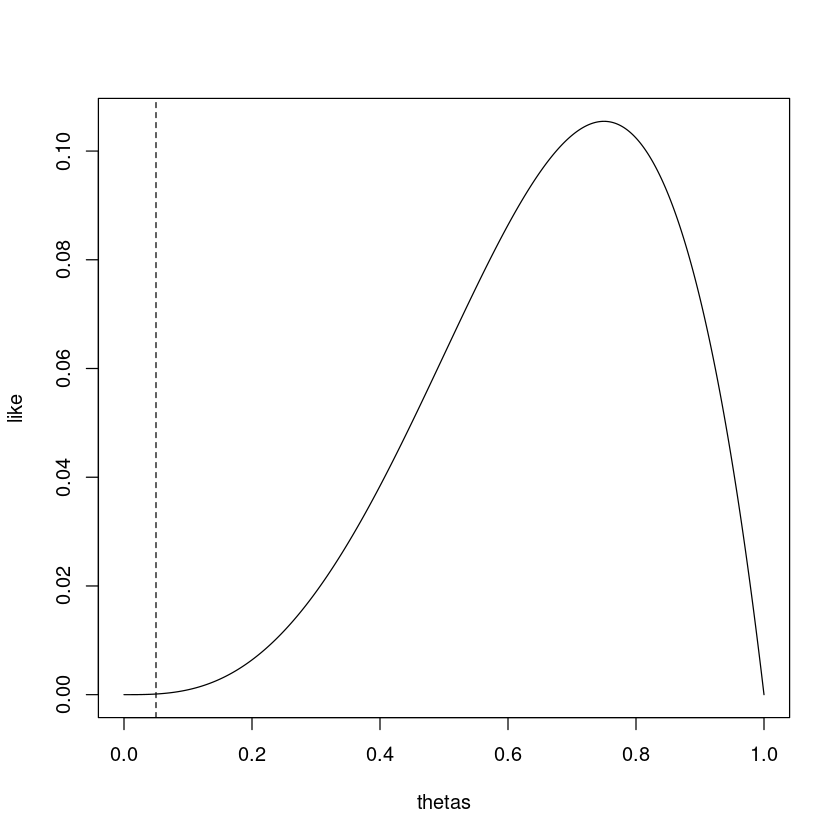

In [13]:
plot(thetas,like, type="l")
abline(v=0.05, lty=2)

Imagine that in the likelihood approach we use only one visual (or auditive) organ,
i.e. our eyes (or ears).
<img src="Images/EyeOnly.png" width="800" height="800" />

However, in real life, we take many decisions based not solely on what we observe but
also on some believes of ours.

We usually use another organ, the brain, to make inferences on the probability of a particular
event to occur.
<img src="Images/EyeBrain.png" width="800" height="800" />

Note that in this cartoon the brain is "blind", in the sense that it does not observe the data
(no arrow pointing to the eye) but its inferences on the event are based on its own believes.

Back to the Loch Ness monster case, we can clearly have some believes whether or not Nessie
exists not only because I told you I saw it.
This "belief" expresses the probability of Nessie existing $P(\theta)$ unconditional of the data.

Our intuition is that the probability of Nessie existing is somehow a joint product of the likelihood (the eyes) and the belief (the brain).

Therefore, $P(\theta|D) \propto P(D|\theta)P(\theta)$.

How can we define $P(\theta)$?
This depends on our blind "belief" function.

If you are a Sci-Fi fan you might be inclined to set a higher probability (e.g. $P(\theta=0.2)$) than the one a
pragmatical and sceptical person would set (e.g. $P(\theta=0.002)$).

[1] 0.667

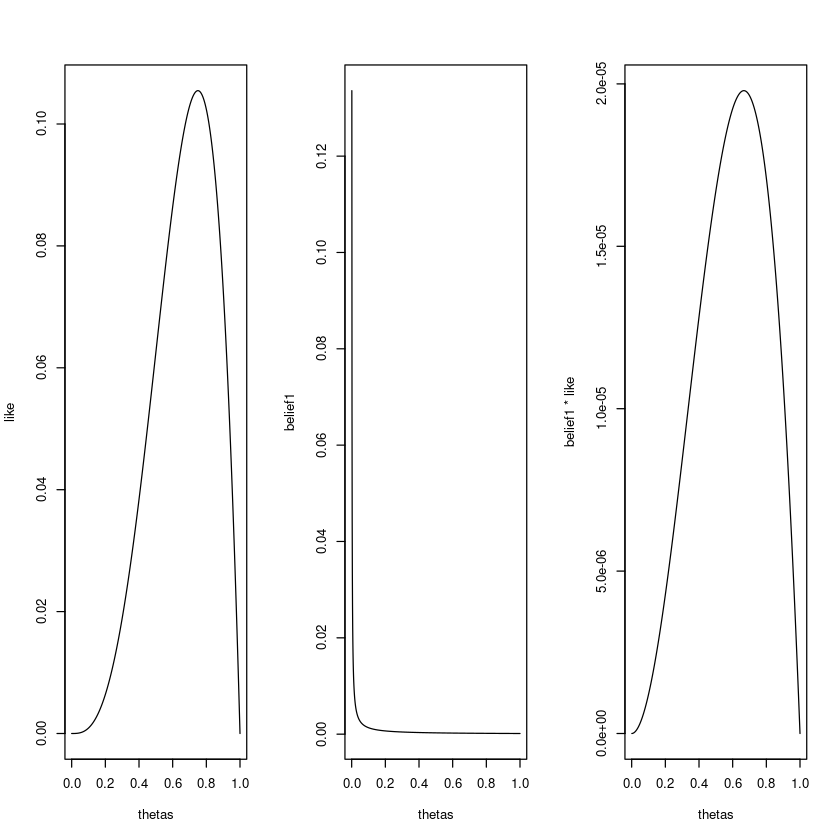

In [19]:
# skeptical
belief1 <- 1/thetas
belief1[1] <- NA
belief1 <- belief1/sum(belief1, na.rm=T)

par(mfrow=c(1,3))
plot(thetas,like,type="l")
plot(thetas,belief1,type="l")
plot(thetas,belief1*like,type="l")
thetas[which.max(belief1*like)]

[1] 0.001

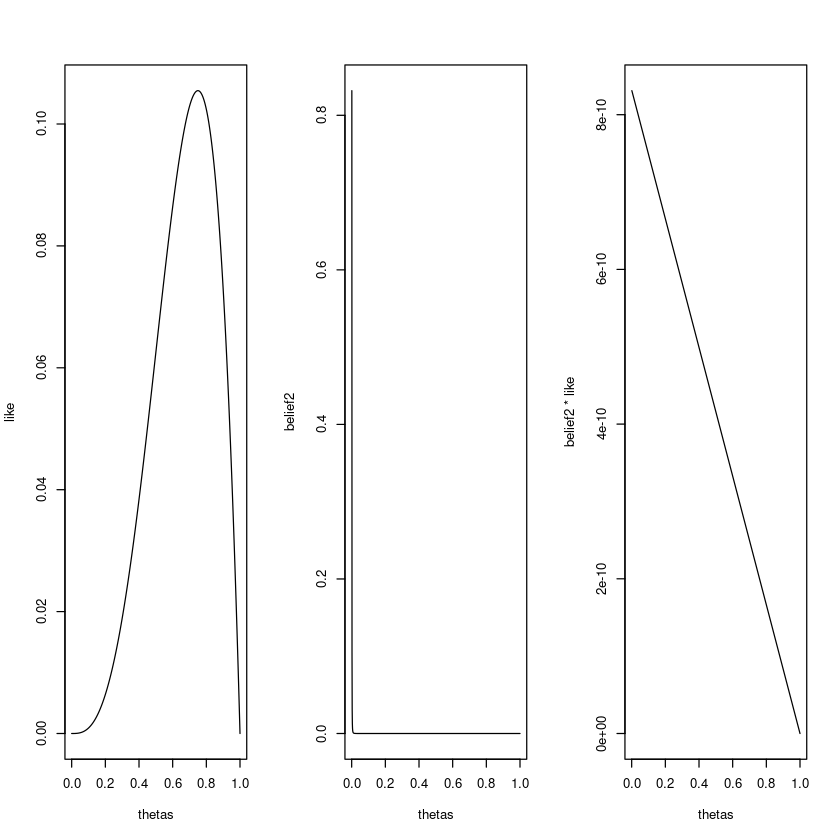

In [22]:
# very skeptical
belief2 <- 1/thetas^3
belief2[1] <- NA
belief2 <- belief2/sum(belief2, na.rm=T)

par(mfrow=c(1,3))
plot(thetas,like,type="l")
plot(thetas,belief2,type="l")
plot(thetas,belief2*like,type="l")
thetas[which.max(belief2*like)]

Note that these are not proper probabilities (we will see later how to calculate proper probabilities using "belief" functions).
We can deduct how the choice of a different "belief" function can point us to either different conclusions or confidence levels.

In statistics, the "belief" function (e.g. $P(\theta)$) is called _prior probability_ and
the joint product of the likelihood ($P(D|\theta)$) and the prior ($P(\theta)$) is proportional to
the _posterior probability_ ($P(\theta|D)$).

The use of posterior probabilities for inferences is called Bayesian statistics.

* The _frequentist_ is based on imagining repeated sampling from a particular
 model, which defines the probability of the observed data conditional on unknown parameters.
* The _likelihoodist_ uses the sampling model as the frequentists but all
 inferences are based on the observed data only.
* The _Bayesian_ requires a sampling model (the likelihood) and a prior distribution
  on all unknown parameters. The prior and the likelihood are used to compute the
  conditional distribution of the unknown parameters given the observed data.

To put it in a different perspective, assuming $D$ is the data and $\theta$ is your unknown parameter,
the frequentist approach conditions on parameters and integrates over the data, $p(D|\theta)$.

On the other hand, the Bayesian approach conditions on the data and integrates over the
parameters, $p(\theta|D)$.

* The _Empirical Bayesian_ (EB) allows the observed data to contribute to
  defining the prior distribution.
<img src="Images/EyeBrainEB.png" width="800" height="800" />